In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

++++++++++++++++++++++++++++++++++ DATA EXPLORATION ++++++++++++++++++++++++++++++++++



**1. Data Summary and Description**

In [4]:
#table info
properties = pd.read_csv('properties_augmented_numerical2.csv')
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              842 non-null    int64  
 1   price                   842 non-null    float64
 2   region                  842 non-null    object 
 3   address                 842 non-null    object 
 4   Latitude                842 non-null    float64
 5   Longitude               842 non-null    float64
 6   zipcode                 842 non-null    object 
 7   FSA                     842 non-null    object 
 8   total_number_tax_filed  842 non-null    float64
 9   total_income            842 non-null    float64
 10  net_income              842 non-null    float64
 11  taxable_income          842 non-null    float64
 12  postalCode              842 non-null    object 
 13  Population              842 non-null    int64  
 14  Total pvt dwlgs         842 non-null    in

In [5]:
#descriptive statistics mean, median, std
properties.drop(properties.columns[0], axis=1, inplace=True)
result = properties.agg(['mean', 'median', 'std'])
print(result)

                price   Latitude  Longitude  total_number_tax_filed  \
mean    737995.654988  45.529513 -73.600853            19179.299287   
median  579769.000000  45.524671 -73.580179            19430.000000   
std     965440.831234   0.053121   0.070345             6848.990542   

        total_income    net_income  taxable_income    Population  \
mean    9.794744e+08  8.963197e+08    8.625921e+08  23025.982185   
median  1.014186e+09  9.337750e+08    8.945290e+08  23870.000000   
std     3.136328e+08  2.837909e+08    2.779807e+08   9131.527898   

        Total pvt dwlgs  Num_beds  full_baths  half_baths  living_surface_ft2  \
mean       11918.276722  3.077197    1.478622    0.283848         5465.276722   
median     12408.000000  2.000000    1.000000    0.000000         1038.000000   
std         4311.422984  4.623260    0.961887    0.555119       114528.585037   

        avg_income_submitted  
mean            54399.145374  
median          47730.979499  
std             18606.51

<ipython-input-5-c52e5f388abc>:3: FutureWarning: ['region', 'address', 'zipcode', 'FSA', 'postalCode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  result = properties.agg(['mean', 'median', 'std'])


              price    Latitude   Longitude  total_number_tax_filed  \
count  8.420000e+02  842.000000  842.000000              842.000000   
mean   7.379957e+05   45.529513  -73.600853            19179.299287   
std    9.654408e+05    0.053121    0.070345             6848.990542   
min   -1.000000e+00   45.403734  -73.946668              490.000000   
25%    4.100000e+05   45.495081  -73.631669            13960.000000   
50%    5.797690e+05   45.524671  -73.580179            19430.000000   
75%    8.290000e+05   45.554430  -73.558186            23710.000000   
max    1.820000e+07   45.700890  -73.481450            38440.000000   

       total_income    net_income  taxable_income    Population  \
count  8.420000e+02  8.420000e+02    8.420000e+02    842.000000   
mean   9.794744e+08  8.963197e+08    8.625921e+08  23025.982185   
std    3.136328e+08  2.837909e+08    2.779807e+08   9131.527898   
min    3.297900e+07  2.964700e+07    2.926500e+07    560.000000   
25%    7.428870e+08  6.77

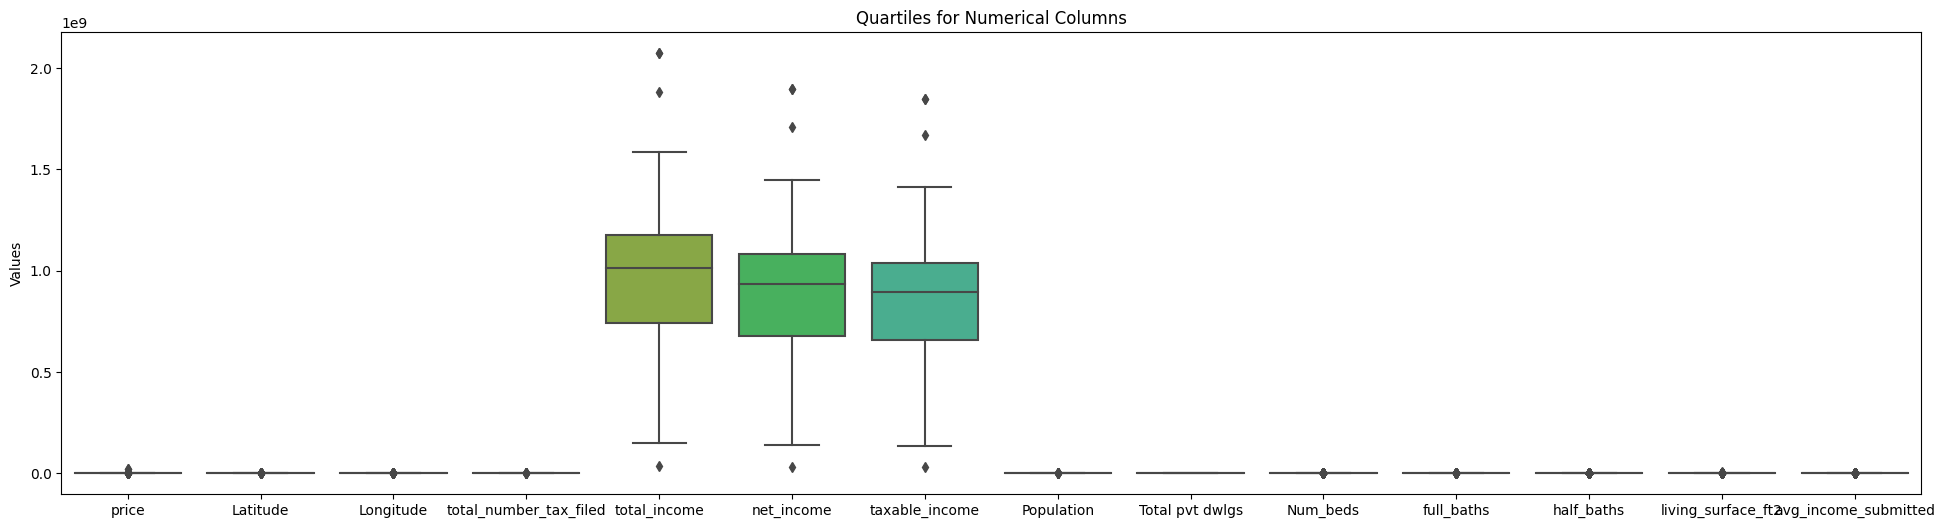

In [6]:
#quartile information and vizualizing quartiles with box plots

quartiles = properties.describe(percentiles=[.25, .5, .75])
print(quartiles)

# Using a box plot to visualize quartiles for each column
plt.figure(figsize=(24, 6))
sns.boxplot(data=properties, orient='v')
plt.title('Quartiles for Numerical Columns')
plt.ylabel('Values')
plt.show()

**2. Data Exploration**

The FSA is an important column which might give us insight into if houses are more or less expensive in some parts of the city ie:if there is a strong correlation of some sort. Therefore we change it from categorical to numerical

In [7]:
#changing FSA from categorical to numerical
encoder = LabelEncoder()
FSA_cat = properties['FSA']
FSA_cat_encoded = encoder.fit_transform(FSA_cat)

#showing encodings and represented
FSA_cat_encoded

array([ 8, 31, 30,  1, 24, 21, 16, 22, 84, 18,  1, 25, 32,  8, 47, 83, 67,
       34, 44, 43, 47, 25,  7, 28, 43, 48, 42, 83, 42, 19, 17, 12, 48, 61,
        9, 42, 66,  7, 25, 19, 48,  8, 43, 25,  7, 27, 27,  8, 16, 27,  0,
       58, 68, 61, 42, 46, 33, 42, 17, 17,  7, 58, 19, 42, 43, 44, 10, 15,
       43,  8, 45, 48, 42,  6, 61, 24, 88,  0, 37, 77, 68, 38, 26, 68,  7,
       70, 42,  0, 84, 27, 31, 29, 68, 50, 44,  4,  4,  9, 79, 26,  7, 87,
        9, 47, 15, 58, 62, 37, 42, 89, 73, 31, 41, 90, 16, 32, 17,  8, 32,
       32, 47, 28, 28, 18, 42, 69,  1, 62, 69, 54, 68, 15, 72, 55,  5, 18,
       70, 16, 50, 78, 28,  7, 18, 26, 69,  4, 43, 33, 26, 39,  7, 34, 20,
       58, 18, 70, 44, 67,  1, 26, 26, 68, 14, 14, 22, 61,  0, 37, 59, 53,
       22, 60, 26, 39, 10, 20, 22, 61,  9, 47, 15, 14, 24, 11, 62, 78, 27,
       76, 30, 22, 70, 16, 64, 79,  3, 62, 32, 18, 24, 44, 79, 14, 17, 37,
       61,  5, 60, 18, 22, 55, 27, 13,  8,  2,  8, 37,  0, 32, 42, 10, 49,
       39, 32,  1, 42, 48

In [8]:
print(encoder.classes_)

['H1A' 'H1B' 'H1C' 'H1E' 'H1G' 'H1H' 'H1J' 'H1K' 'H1L' 'H1M' 'H1N' 'H1P'
 'H1R' 'H1S' 'H1T' 'H1V' 'H1W' 'H1X' 'H1Y' 'H1Z' 'H2A' 'H2B' 'H2C' 'H2E'
 'H2G' 'H2H' 'H2J' 'H2K' 'H2L' 'H2M' 'H2N' 'H2P' 'H2R' 'H2S' 'H2T' 'H2V'
 'H2W' 'H2X' 'H2Y' 'H2Z' 'H3A' 'H3B' 'H3C' 'H3E' 'H3G' 'H3H' 'H3J' 'H3K'
 'H3L' 'H3M' 'H3N' 'H3S' 'H3T' 'H3V' 'H3W' 'H3X' 'H3Y' 'H3Z' 'H4A' 'H4B'
 'H4C' 'H4E' 'H4G' 'H4H' 'H4J' 'H4K' 'H4L' 'H4M' 'H4N' 'H4P' 'H4R' 'H4S'
 'H4V' 'H4W' 'H8N' 'H8P' 'H8R' 'H8S' 'H8T' 'H8Y' 'H8Z' 'H9B' 'H9C' 'H9H'
 'H9J' 'H9K' 'H9P' 'H9R' 'H9S' 'H9W' 'H9X']


In [9]:
#saving the column
properties.insert(loc=8, column='FSA_encoded', value=FSA_cat_encoded)

#saving the table
df = pd.DataFrame(properties)
df.to_csv('properties_FSA_encoded.csv', index=False)

The FSA is technically representative of longitude/latitude, full postal code, address, and region.
Therefore we can drop those columns to keep a good ratio of columns per record rows and reduce noise.
Most of the above columns are categorical anyway so by dropping them we keep all numerical attributes for further transformation and ML

In [10]:
properties_FSA_encoded = pd.read_csv('properties_FSA_encoded.csv')
properties_FSA_encoded.drop(['region', 'address', 'zipcode', 'postalCode','Latitude','Longitude'], axis=1, inplace=True)
properties_FSA_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   842 non-null    float64
 1   FSA                     842 non-null    object 
 2   total_number_tax_filed  842 non-null    float64
 3   FSA_encoded             842 non-null    int64  
 4   total_income            842 non-null    float64
 5   net_income              842 non-null    float64
 6   taxable_income          842 non-null    float64
 7   Population              842 non-null    int64  
 8   Total pvt dwlgs         842 non-null    int64  
 9   Num_beds                842 non-null    int64  
 10  full_baths              842 non-null    int64  
 11  half_baths              842 non-null    int64  
 12  living_surface_ft2      842 non-null    int64  
 13  avg_income_submitted    842 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory 

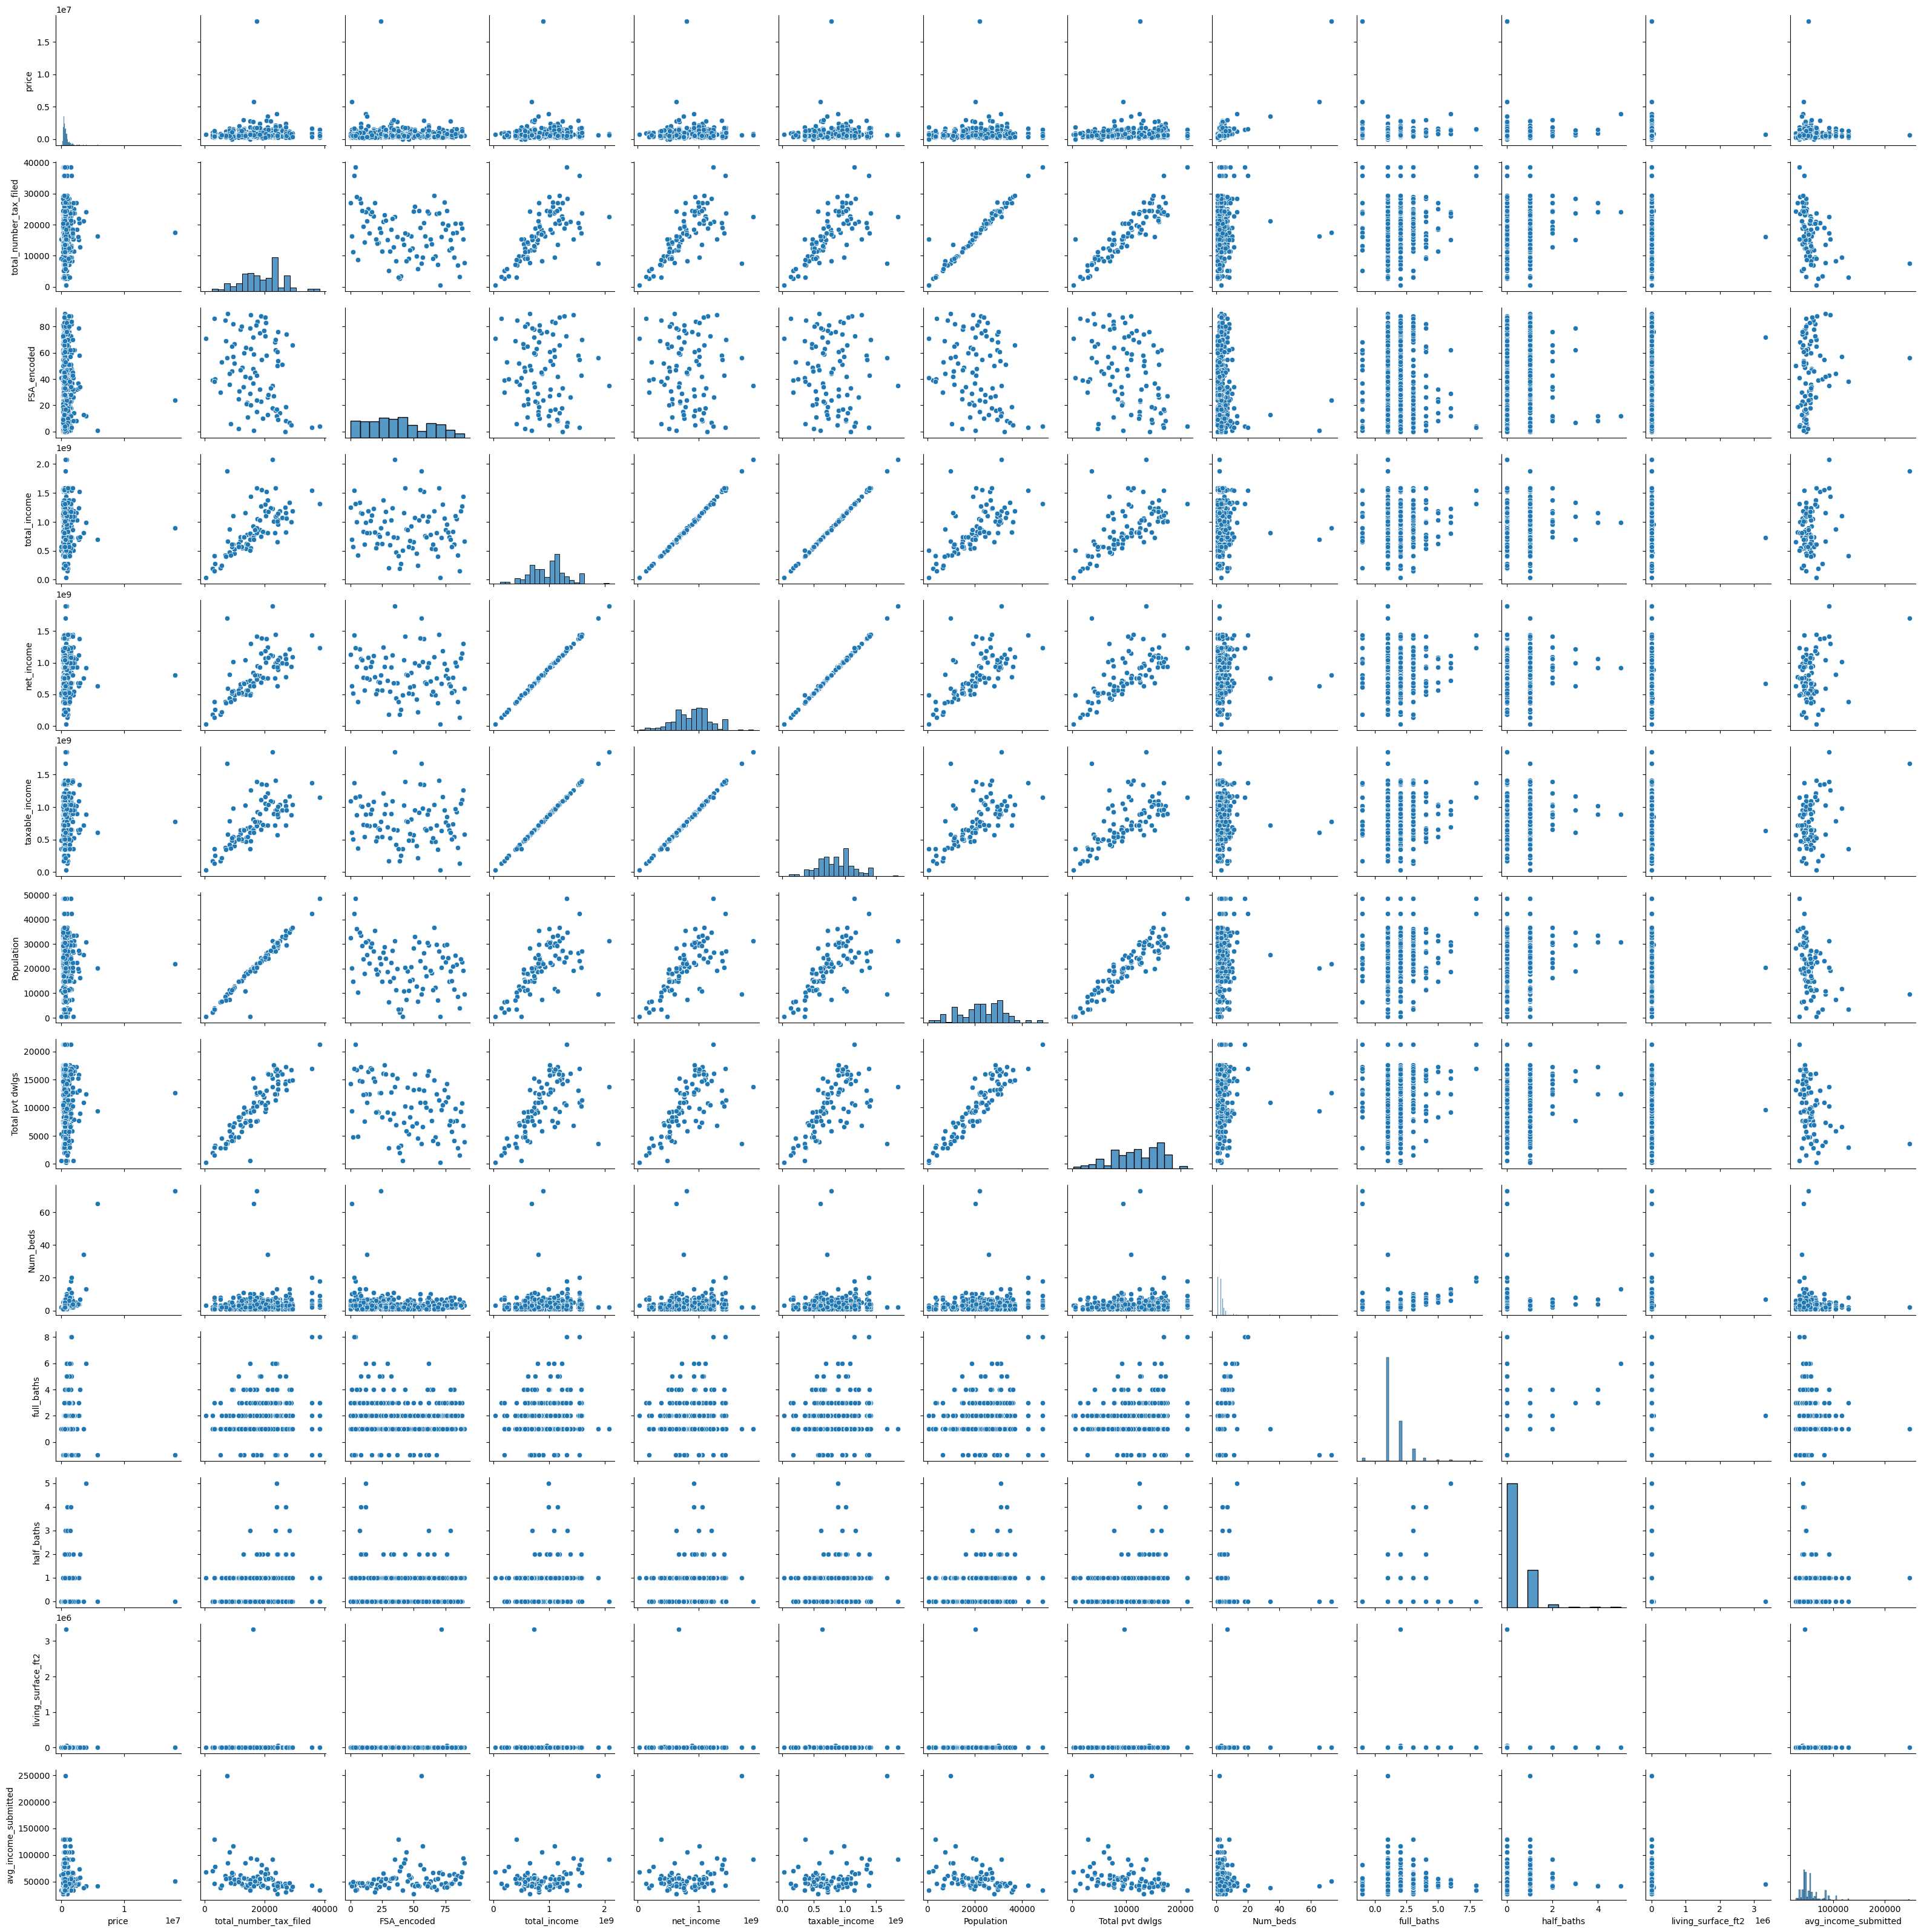

In [11]:
sns.pairplot(properties_FSA_encoded)
plt.show()

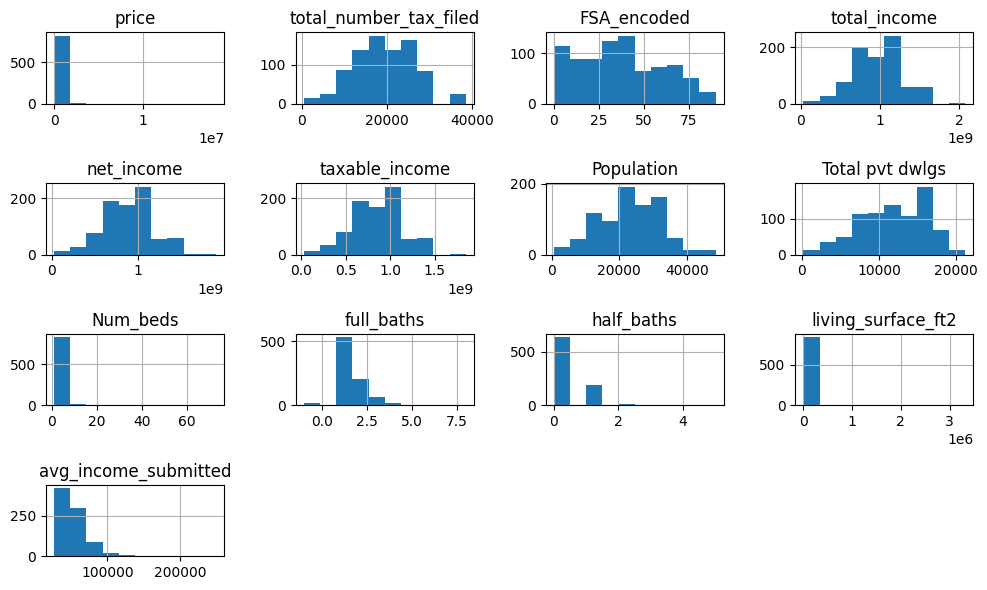

In [12]:
#checking out the data before transformation
properties_FSA_encoded.drop(properties_FSA_encoded.columns[0], axis=1, inplace=False)
properties_FSA_encoded.hist(figsize=(10, 6))
plt.tight_layout()

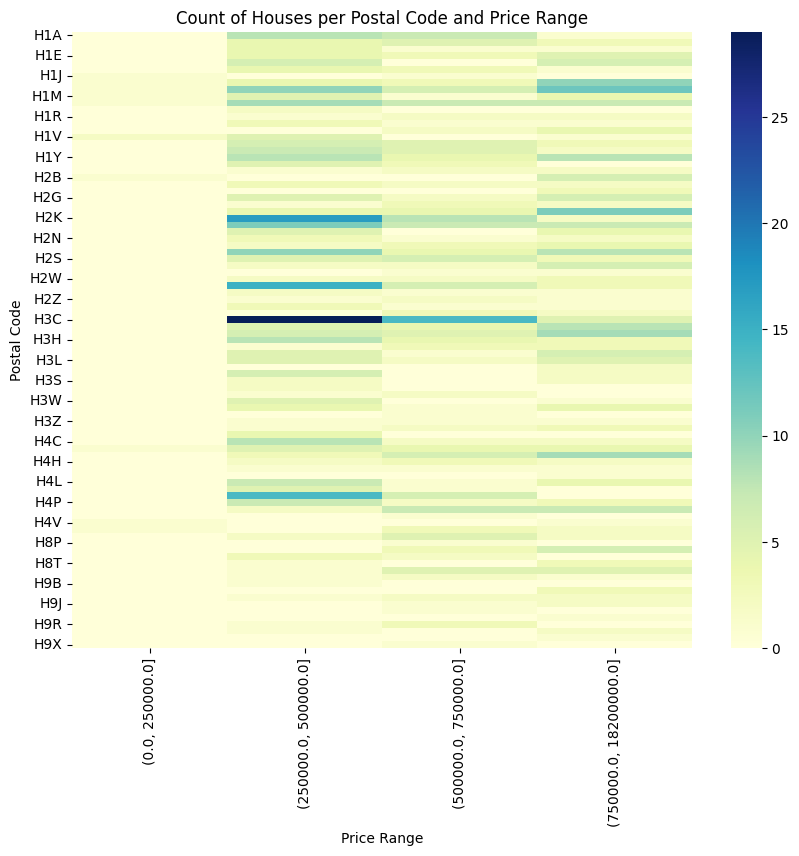

In [13]:
#zooming in on the postal codes to see if (FSA) postal code says something about price
# Bin the prices into ranges for better visualization
price_ranges = [0, 250000, 500000, 750000, properties['price'].max()]

properties['Price_Range'] = pd.cut(properties['price'], bins=price_ranges)
# Create a pivot table to get counts of houses per postal code and price range
pivot_table = properties.pivot_table(index='FSA', columns='Price_Range', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=False, fmt='d', cmap='YlGnBu')

# Adding titles and labels
plt.title('Count of Houses per Postal Code and Price Range')
plt.xlabel('Price Range')
plt.ylabel('Postal Code')

# Display the heatmap
plt.show()

One can see that Anjou has the most pricey houses.

In [14]:
#since price is what we want to predict
# we just check what the correlations of other attributes with price are before any transformations
corr_matrix = properties_FSA_encoded.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-14-cd38c5765cd4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = properties_FSA_encoded.corr()


price                     1.000000
Num_beds                  0.859508
half_baths                0.110222
full_baths                0.045858
total_income              0.005053
taxable_income            0.004030
avg_income_submitted      0.003226
living_surface_ft2        0.002536
net_income                0.002061
Total pvt dwlgs           0.001653
Population               -0.001666
total_number_tax_filed   -0.014562
FSA_encoded              -0.024260
Name: price, dtype: float64

<ipython-input-15-466da4fa1f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = properties_FSA_encoded.corr()


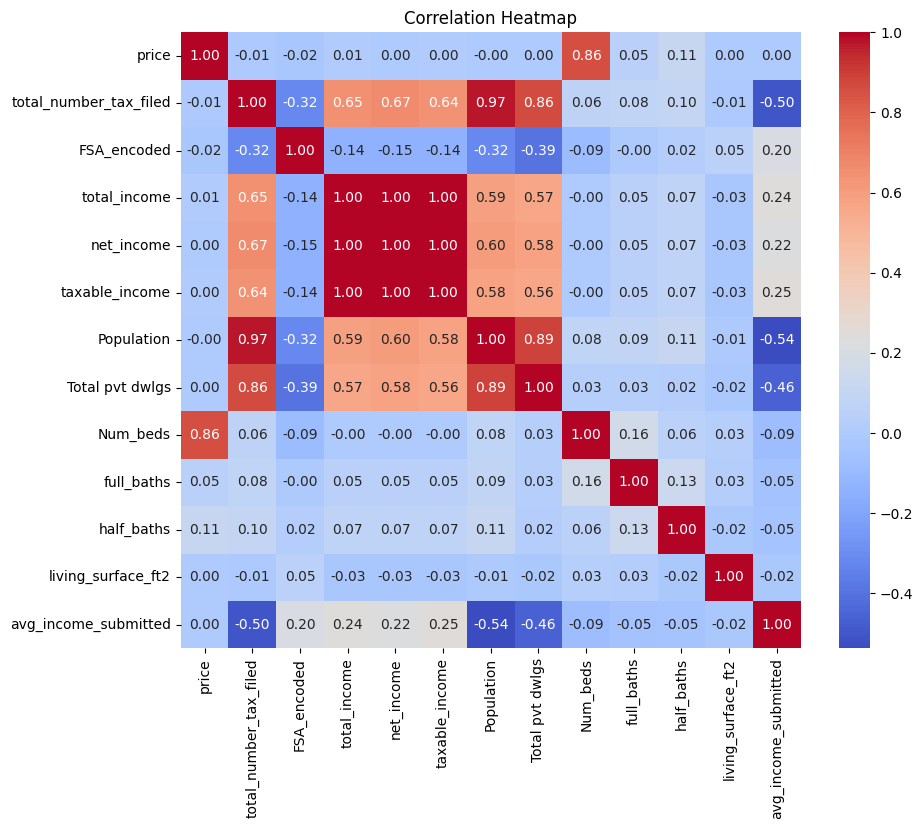

In [15]:
#heatmap for the correlations
correlation_matrix = properties_FSA_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

One can see that number of bedrooms has the strongest coorelation wiht price which makes it a strong predictor

In [16]:
def format_ticks(x, pos):
    return '{:.0f}'.format(x)

In [17]:
#from the histograms one can see that some columns have negatives values (-1 to be specific)
#this is a place holder we used for nulls while doing some augmentation and merging tables

# Only two rows have (price=-1)

for column in properties_FSA_encoded.columns:
    if (properties[column] == -1).any():
        print(column)

price
full_baths
living_surface_ft2


In [18]:
#put nan back
for index, row in properties_FSA_encoded.iterrows():
    if row['price'] == -1:
        properties_FSA_encoded.at[index, 'price'] = np.nan
    if row['full_baths'] == -1:
        properties_FSA_encoded.at[index, 'full_baths'] = np.nan
    if row['living_surface_ft2'] == -1:
        properties_FSA_encoded.at[index, 'living_surface_ft2'] = np.nan

In [19]:
# Looking at the data we can conclude that the median (not the mean)
# is a better replacement since the three columns are heavily skewed
median_price = properties_FSA_encoded['price'].median()
print("Median price:", median_price)

median_full_baths = properties_FSA_encoded['full_baths'].median()
print("Median full_baths:", median_full_baths)

median_living_surface_ft2 = properties_FSA_encoded['living_surface_ft2'].median()
print("Median living_surface_ft2:", median_living_surface_ft2)


Median price: 580000.0
Median full_baths: 1.0
Median living_surface_ft2: 1060.5


In [20]:
properties_FSA_encoded['price'] = properties_FSA_encoded['price'].fillna(properties_FSA_encoded['price'].median())

properties_FSA_encoded['full_baths'] = properties_FSA_encoded['full_baths'].fillna(properties_FSA_encoded['full_baths'].median())

properties_FSA_encoded['living_surface_ft2'] = properties_FSA_encoded['living_surface_ft2'].fillna(properties_FSA_encoded['living_surface_ft2'].median())

df = pd.DataFrame(properties_FSA_encoded)
df.to_csv('properties_noNulls.csv', index=False)

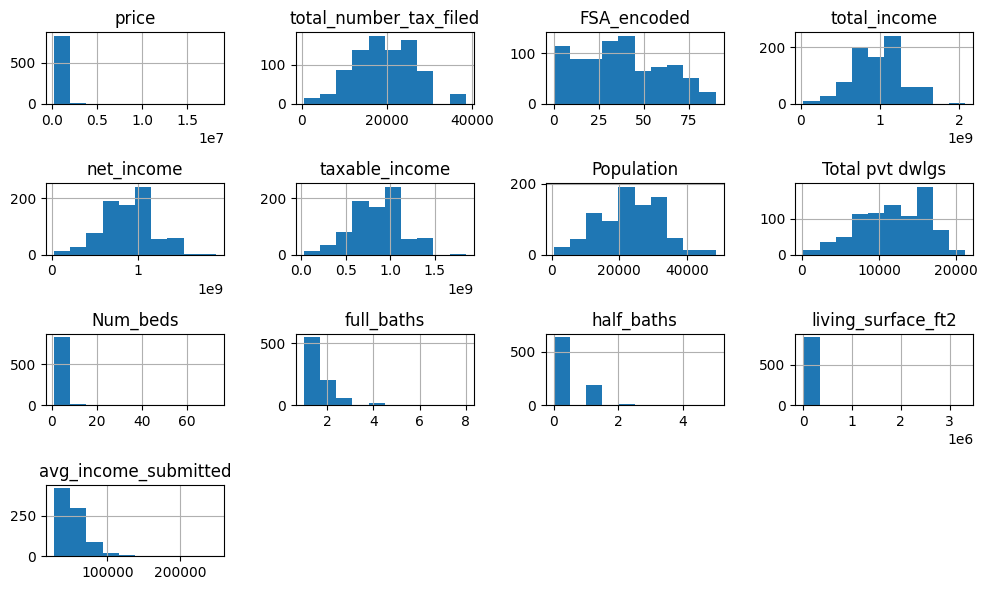

In [21]:
properties_noNulls = pd.read_csv('properties_noNulls.csv')

#checking out the data after imputation of null values
properties_noNulls.hist(figsize=(10, 6))
plt.tight_layout()

Zooming in on the price and number of beds columns to see the trend.
They both have a tail (indicator of possible outliers)

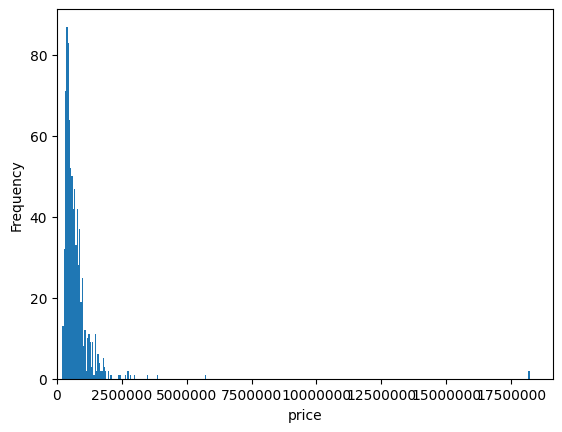

In [22]:
bin_width = 50000
bin_min = int(properties_noNulls['price'].min())
bin_max = int(properties_noNulls['price'].max())
bin_edges = range(bin_min, bin_max + bin_width, bin_width)

plt.hist(properties_noNulls['price'], bins=bin_edges)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

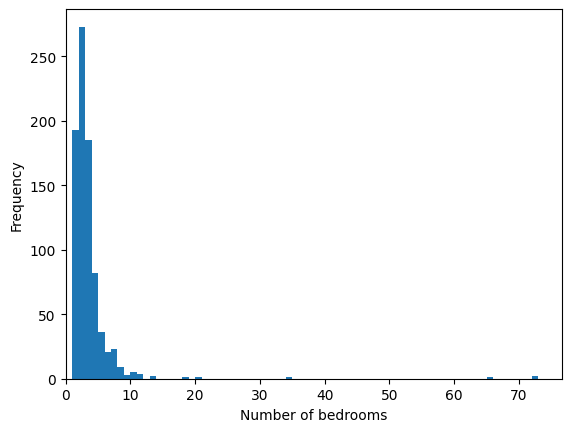

In [23]:
bin_width = 1
bin_min = int(properties_noNulls['Num_beds'].min())
bin_max = int(properties_noNulls['Num_beds'].max())
bin_edges = range(bin_min, bin_max + bin_width, bin_width)

plt.hist(properties_noNulls['Num_beds'], bins=bin_edges)
plt.xlabel('Number of bedrooms')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))

From looking at the histogram you can see there are outliers. They could be valid but we want to predict the price of a home that someone can buy on a regular basis. chances of someone buying a 34 or 78 bedroom house are pretty low. so instead of using a method such as IQR range imputation, we remove outliers from Num_beds column which are houses with more than 20 bedrooms.

**3. Data Cleaning**

Lets try to check the correlation of some tail-heavy features with normalization and scaling before cleaning so we can compare to the results after cleaning.

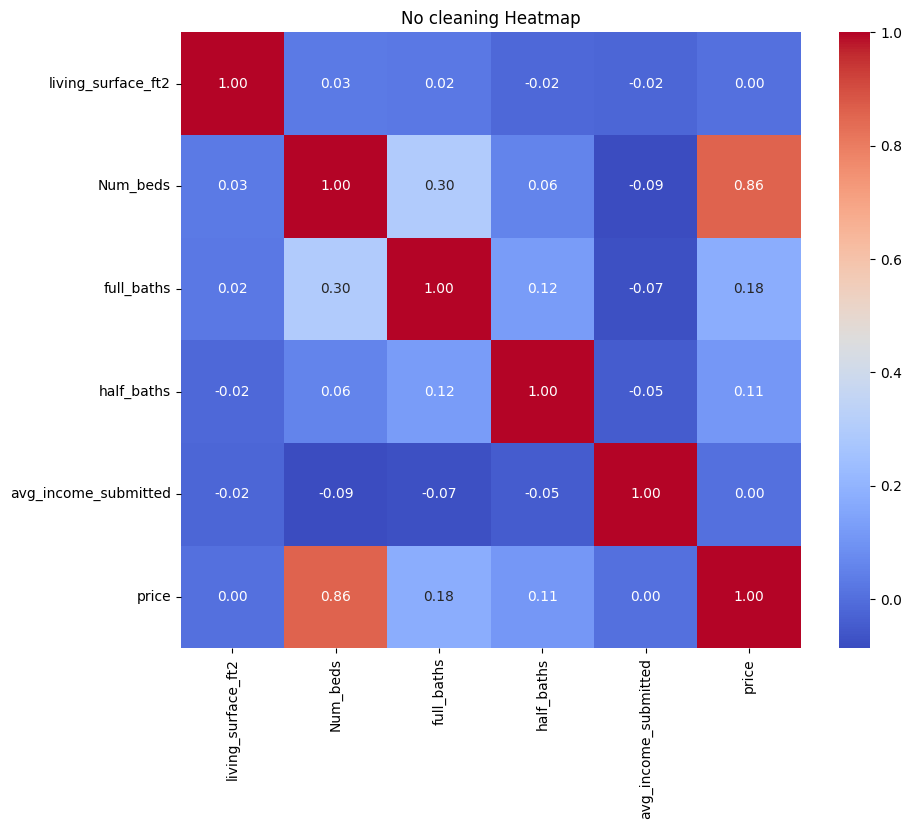

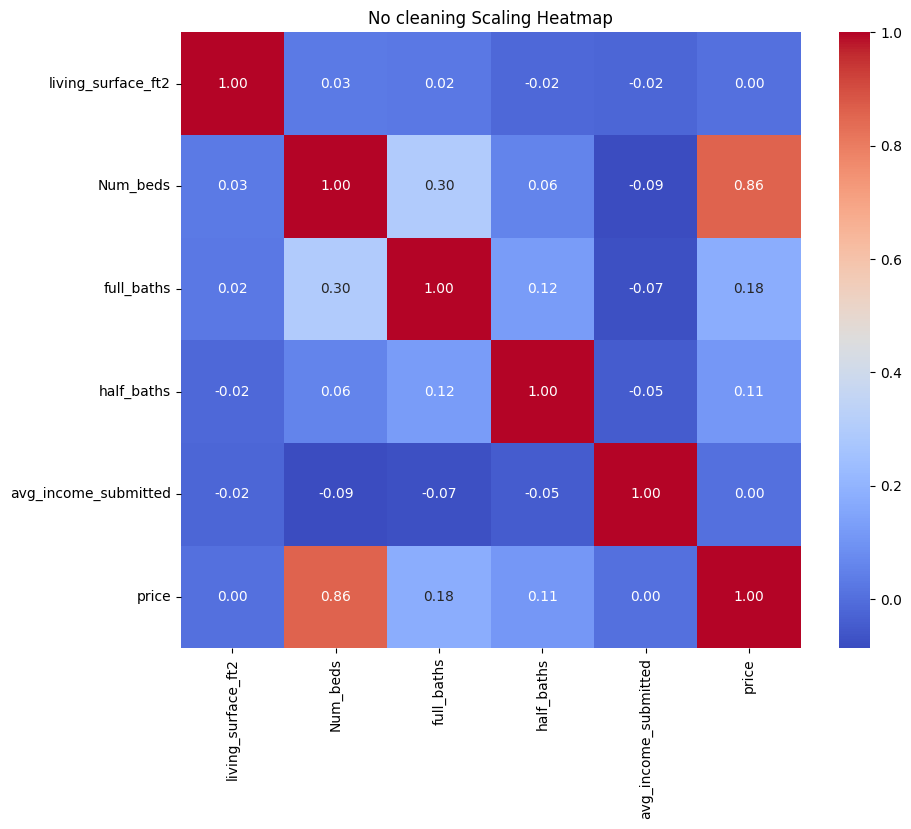

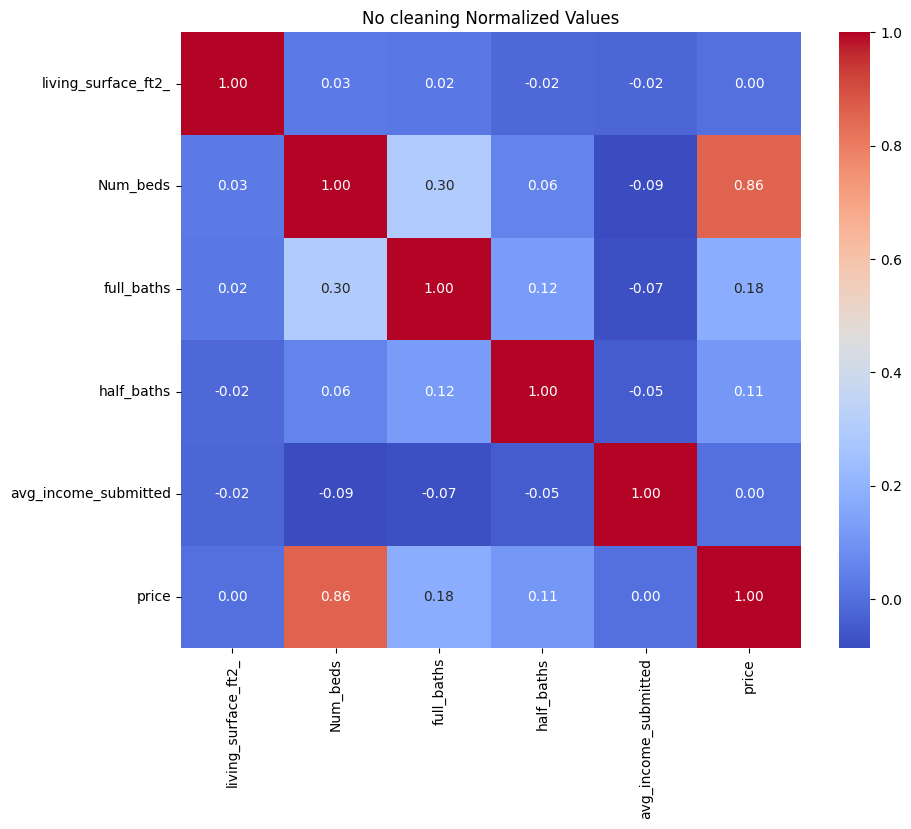

In [24]:
# Do not touch price since it is not a feature
properties_noOutliers = pd.read_csv('properties_noNulls.csv')
data = properties_noNulls[['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted', 'price']]

#heatmap for the correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('No cleaning Heatmap')
plt.show()

# Do not touch price since it is not a feature
properties_noOutliers = pd.read_csv('properties_noNulls.csv')
data = properties_noNulls[['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted']]
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted'])
data['price'] = properties_noNulls['price']

#heatmap for the correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('No cleaning Scaling Heatmap')
plt.show()

# Do not touch price since it is not a feature
properties_noOutliers = pd.read_csv('properties_noNulls.csv')
data = properties_noNulls[['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted']]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['living_surface_ft2_', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted'])
data['price'] = properties_noNulls[['price']]

#heatmap for the correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('No cleaning Normalized Values')
plt.show()

## Conclusion: Normalizing or Scaling our values does not affect their correlation.

In [25]:
#dropping outliers in Num_beds column
properties_noNulls = properties_noNulls[properties_noNulls['Num_beds'] <= 15]
# Remove properties with a living space of less than 300 sqft
properties_noNulls = properties_noNulls[properties_noNulls['living_surface_ft2'] >= 300]
properties_noNulls = properties_noNulls[properties_noNulls['living_surface_ft2'] <= 4000]

# The price is very skewed, there's no use in comparing the price of a small condo to a mansion
properties_noNulls = properties_noNulls[properties_noNulls['price'] <= 1500000] # 1.5 million

properties_noNulls.to_csv('properties_noOutliers.csv', index=False)

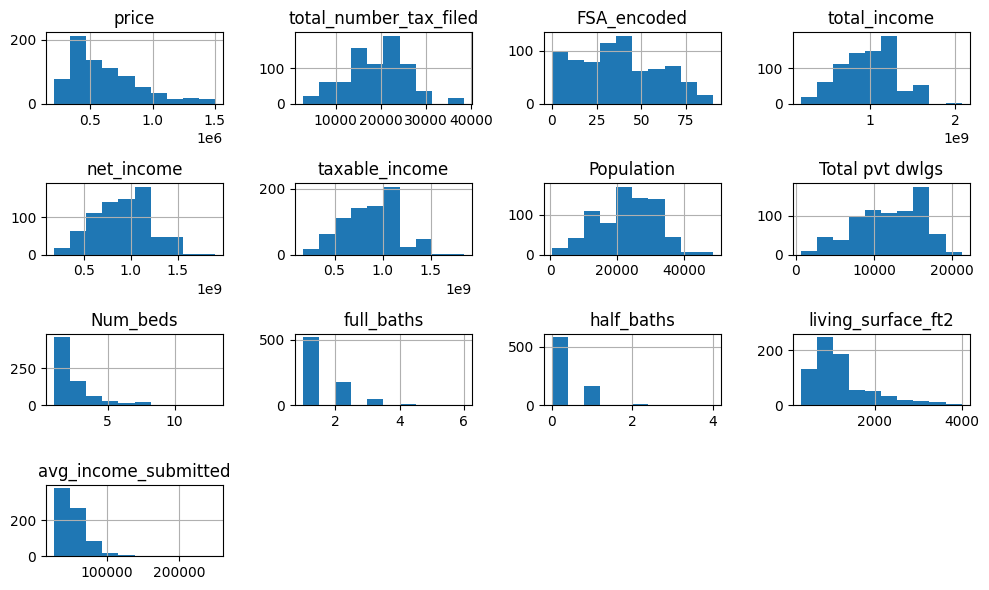

In [26]:
properties_noOutliers = pd.read_csv('properties_noOutliers.csv')

#checking out the data after imputation of outliers in number of bedrooms
properties_noOutliers.hist(figsize=(10, 6))
plt.tight_layout()

## Normalization and Scaling

Before normalization and scaling:

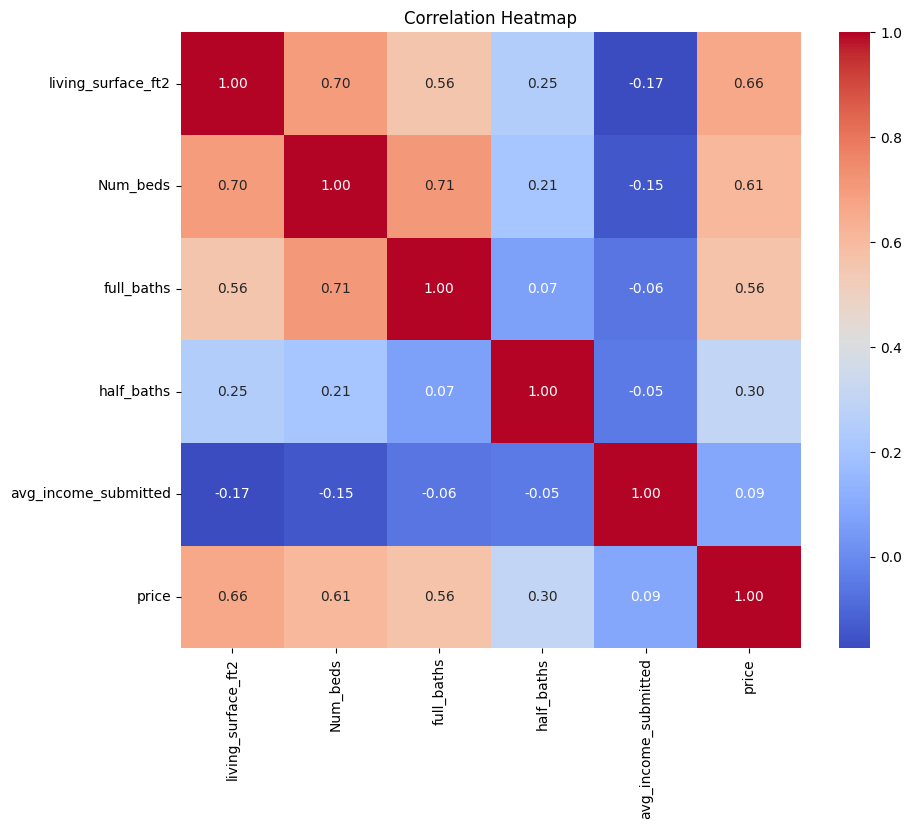

In [27]:
#heatmap for the correlations
properties_noOutliers = pd.read_csv('properties_noOutliers.csv')
data = properties_noOutliers[['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted', 'price']]
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Try to normalize our tail-heavy data (StandardScaler for standardization)

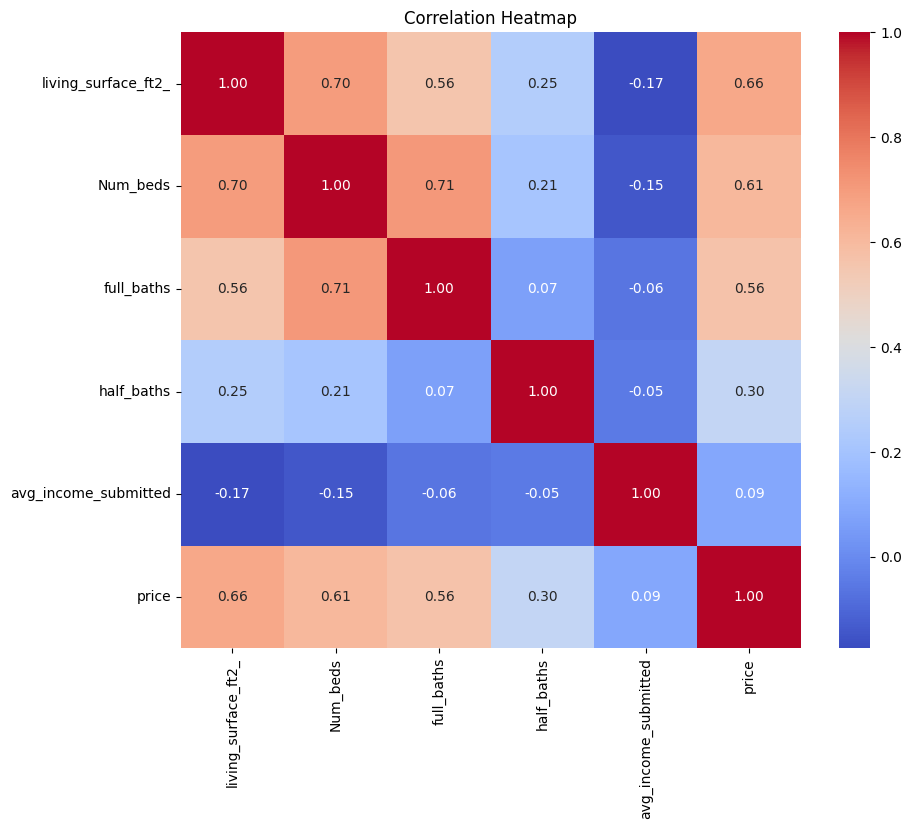

In [28]:
# Do not touch price since it is not a feature
properties_noOutliers = pd.read_csv('properties_noOutliers.csv')
data = properties_noOutliers[['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted']]
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['living_surface_ft2_', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted'])
data['price'] = properties_noOutliers[['price']]

#heatmap for the correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Min-max scaling so values are shifted and rescaled so that they end up ranging from 0 to 1. (MinMaxScaler for normalization)

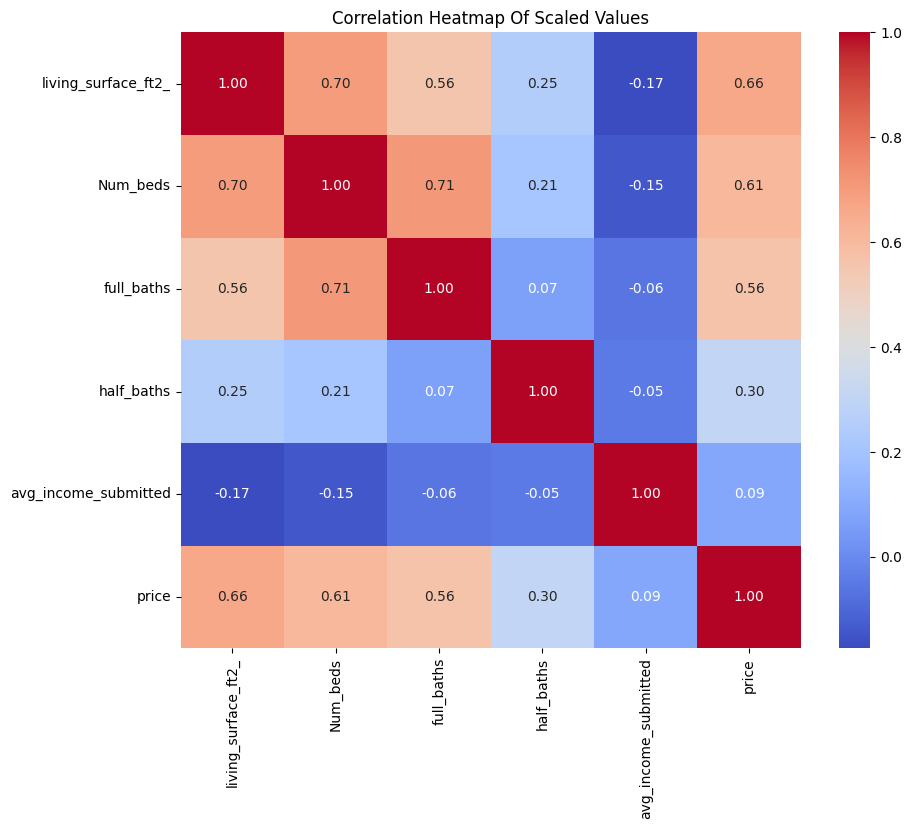

In [29]:
# Do not touch price since it is not a feature
properties_noOutliers = pd.read_csv('properties_noOutliers.csv')
data = properties_noOutliers[['living_surface_ft2', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted']]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['living_surface_ft2_', 'Num_beds', 'full_baths', 'half_baths', 'avg_income_submitted'])
data['price'] = properties_noOutliers[['price']]

#heatmap for the correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Of Scaled Values')
plt.show()


## Scale
Change the range of the data between [0,1]

In [31]:
properties_noOutliers = pd.read_csv('properties_noOutliers.csv')
data = properties_noOutliers[['Num_beds', 'full_baths', 'half_baths']]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=['Num_beds_scaled', 'full_baths_scaled', 'half_baths_scaled'])
properties_noOutliers[['Num_beds', 'full_baths', 'half_baths']] = data[['Num_beds_scaled', 'full_baths_scaled', 'half_baths_scaled']]

properties_noOutliers.to_csv('properties_noOutliers_scaled.csv', index=False)

## Normalize
Change the distribution of living_surface_ft2, avg_income_submitted

In [42]:
properties_noOutliers = pd.read_csv('properties_noOutliers_scaled.csv')

data = properties_noOutliers[['living_surface_ft2', 'avg_income_submitted']]

scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data)
data = pd.DataFrame(data, columns=['living_surface_ft2_normalized', 'avg_income_submitted_normalized'])
properties_noOutliers[['living_surface_ft2', 'avg_income_submitted']] = data[['living_surface_ft2_normalized', 'avg_income_submitted_normalized']]

properties_noOutliers.to_csv('properties_noOutliers_scaled_normalized.csv', index=False)

[[ 1.32509837 -0.62638412]
 [-0.39726806 -0.12777404]
 [ 2.27741583 -0.87873549]
 ...
 [-0.79288956  0.5076171 ]
 [ 1.07642201 -1.07461339]
 [-0.60214348  1.56798414]]


Results of Normalization and Scaling

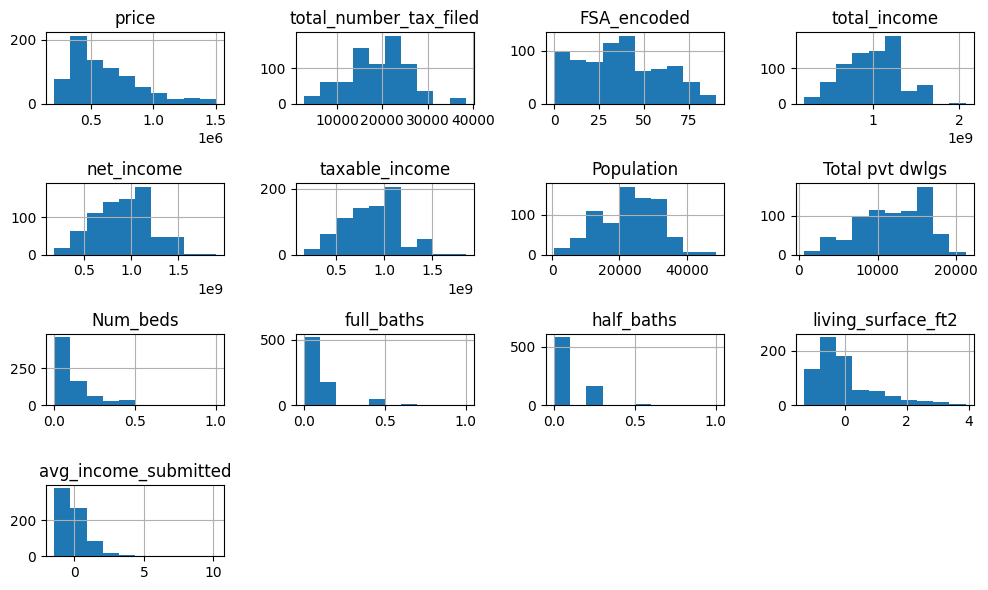

In [43]:
properties_noOutliers = pd.read_csv('properties_noOutliers_scaled_normalized.csv')

#checking out the data after imputation of outliers in number of bedrooms
properties_noOutliers.hist(figsize=(10, 6))
plt.tight_layout()

## Final Heatmap

Since our machine learning task is predicting the price of a house, we want to see the correlation of all attributes in respect to price after imputation.

In [44]:
#calculating correlation of all attributes in respect to price
properties_noOutliers = pd.read_csv('properties_noOutliers_scaled_normalized.csv')
corr_matrix = properties_noOutliers.corr()
corr_matrix['price'].sort_values(ascending=False)

<ipython-input-44-9e5c28aa2462>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = properties_noOutliers.corr()


price                     1.000000
living_surface_ft2        0.664132
Num_beds                  0.609163
full_baths                0.564548
half_baths                0.304944
avg_income_submitted      0.088916
total_income              0.053245
taxable_income            0.051879
FSA_encoded               0.049544
net_income                0.049288
Population               -0.034155
total_number_tax_filed   -0.046406
Total pvt dwlgs          -0.049759
Name: price, dtype: float64

Observation:
 1. after doing some imputation, the correlation between price and the number of bedrooms decreased.
 2. the correlation between price and full_baths as well as with half_baths increased

<ipython-input-45-7fe537a07035>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = properties_noOutliers.corr()


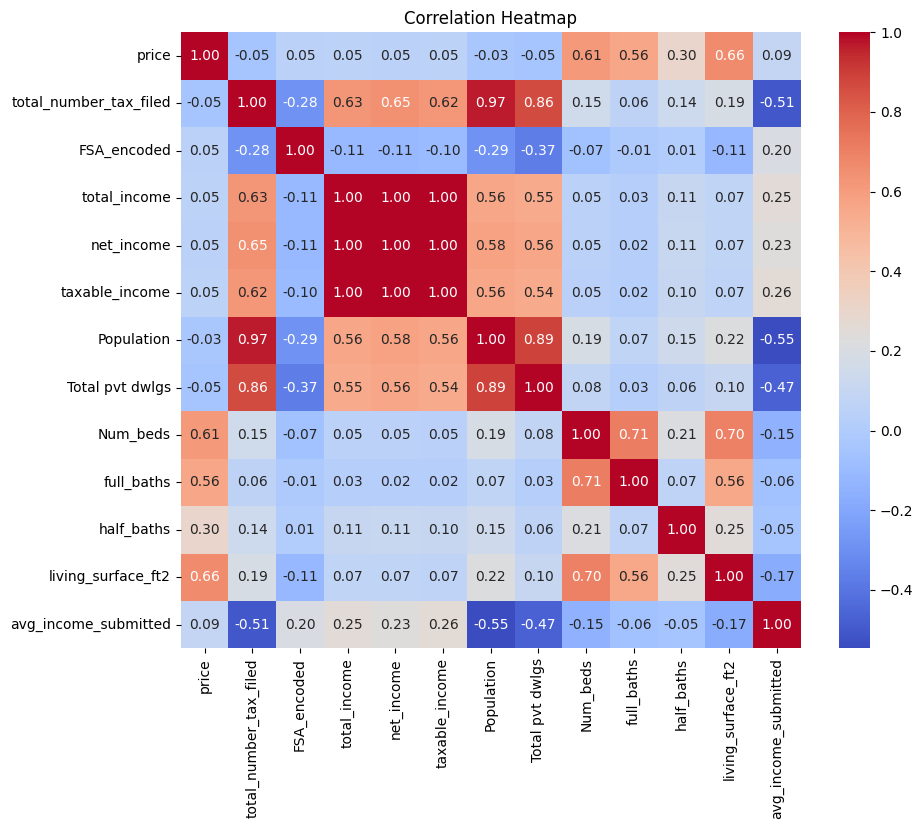

In [45]:
#heatmap for the correlations after cleaning
correlation_matrix = properties_noOutliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

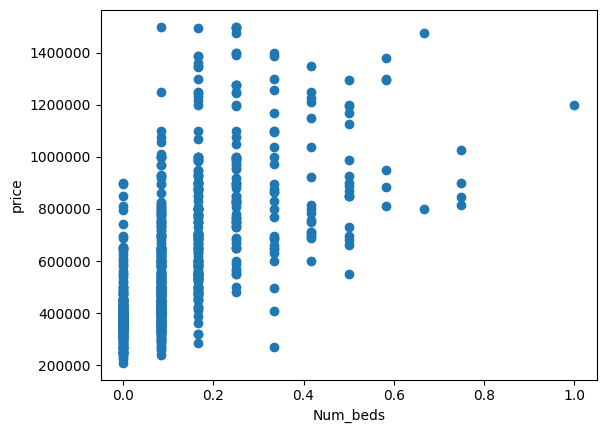

In [46]:
#from the above correlation matrix, price is strongly correlated with the number of bedrooms
#scatter diagram to visualize
plt.scatter(properties_noOutliers['Num_beds'], properties_noOutliers['price'])
plt.xlabel('Num_beds')
plt.ylabel('price')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))


In [47]:
#from the above correlation matrix, price is strongly correlated with the living space
plt.scatter(properties_noOutliers['living_surface_ft2'], properties_noOutliers['price'])
plt.xlabel('living_surface_ft2')
plt.ylabel('price')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

**4. Feature engineering**

We want to do feature engineering and make a new feature of Bed_Bath_Ratio where we add the Num_beds column with full_baths and half_baths to see if the new column will have a higher correlation than just Num_beds which will make it a stronger predictor.

In [48]:
#Creating a new feature by combining bedrooms and bathrooms
properties_noOutliers['Bed_Baths'] = properties_noOutliers['Num_beds'] + properties_noOutliers['full_baths'] + properties_noOutliers['half_baths']


In [49]:
corr_matrix = properties_noOutliers.corr()
corr_matrix['price'].sort_values(ascending=False)


<ipython-input-49-972ab0117740>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = properties_noOutliers.corr()


price                     1.000000
Bed_Baths                 0.665747
living_surface_ft2        0.664132
Num_beds                  0.609163
full_baths                0.564548
half_baths                0.304944
avg_income_submitted      0.088916
total_income              0.053245
taxable_income            0.051879
FSA_encoded               0.049544
net_income                0.049288
Population               -0.034155
total_number_tax_filed   -0.046406
Total pvt dwlgs          -0.049759
Name: price, dtype: float64

In [50]:
#heatmap for the correlations after addding Bed_baths
correlation_matrix = properties_noOutliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-50-750e885c0327>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = properties_noOutliers.corr()


Observation: The correlation of Bed_Baths (combined Num_beds column with full_baths and half_baths) with price is slightly greater than that of just Num_beds with price

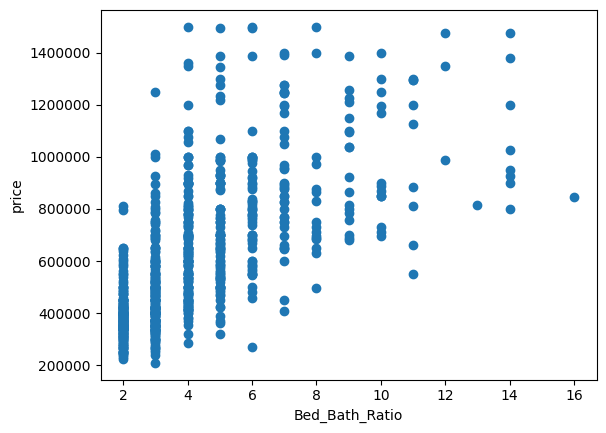

In [ ]:
#scatter diagram to visualize Bed_Bath_Ratio vs price
plt.scatter(properties_noOutliers['Bed_Baths'], properties_noOutliers['price'])
plt.xlabel('Bed_Bath_Ratio')
plt.ylabel('price')

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

In [ ]:
properties_noOutliers.to_csv('properties_bed_baths_combined_2.csv', index=False)